# Adaptive HulC and unimodal HulC for monotone regression 
In this notebook, we compare the performance of adaptive HulC, unimodal HulC, and adaptive unimodal HulC for monotone regression. In a [separate notebook](https://github.com/Arun-Kuchibhotla/HulC/blob/main/R/HulC%20for%20Shape%20Constrained%20Regression.ipynb), we have shown the performance of HulC and adaptive HulC for monotone regression. We recall from the experiments there that the median bias can be large for $x$ values close to the boundary. We will now show experimentally that the monotone LSE has a unimodal limiting distribution and suggests that unimodal HulC as well as adaptive unimodal HulC apply. We are not aware of any results in the literature proving that the limiting distributions are unimodal even in the univariate monotone regression problem. We believe it to be an open problem.

## Unimodality for a flat function
We first consider the case where the conditional mean function is a constant. Formally, let $(X_i, Y_i), 1\le i\le N$ denote observations from
\begin{equation*}
Y_i = f_0(X_i) + \xi_i\quad\mbox{where}\quad f_0(x) = 0,\quad X_i\sim \mathrm{Unif}[0, 1], \quad \xi_i\sim N(0, 1).
\end{equation*}
We take $N = 10^6$ to approximate the limiting distribution. We find the LSE 1000 times with this sample size and plot the histograms at several $x$ values. 

In [1]:
set.seed(100)
nsamp <- 10^6
nrep <- 1000
x_grid <- c(0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9)
n_grid <- length(x_grid)
TMP_iso <- data.frame(value = rep(0, nrep*length(x_grid)), xval = rep(x_grid, nrep))
for(idx in 1:nrep){
  y <- rnorm(nsamp)
  tmp <- isoreg(seq(0,1,length=nsamp),y)
  TMP_iso[seq(n_grid*(idx - 1) + 1, n_grid*idx, by = 1),1] <- tmp$yf[x_grid*nsamp]
}

ERROR: Error in ggplot(TMP_iso, aes(x = value)): could not find function "ggplot"


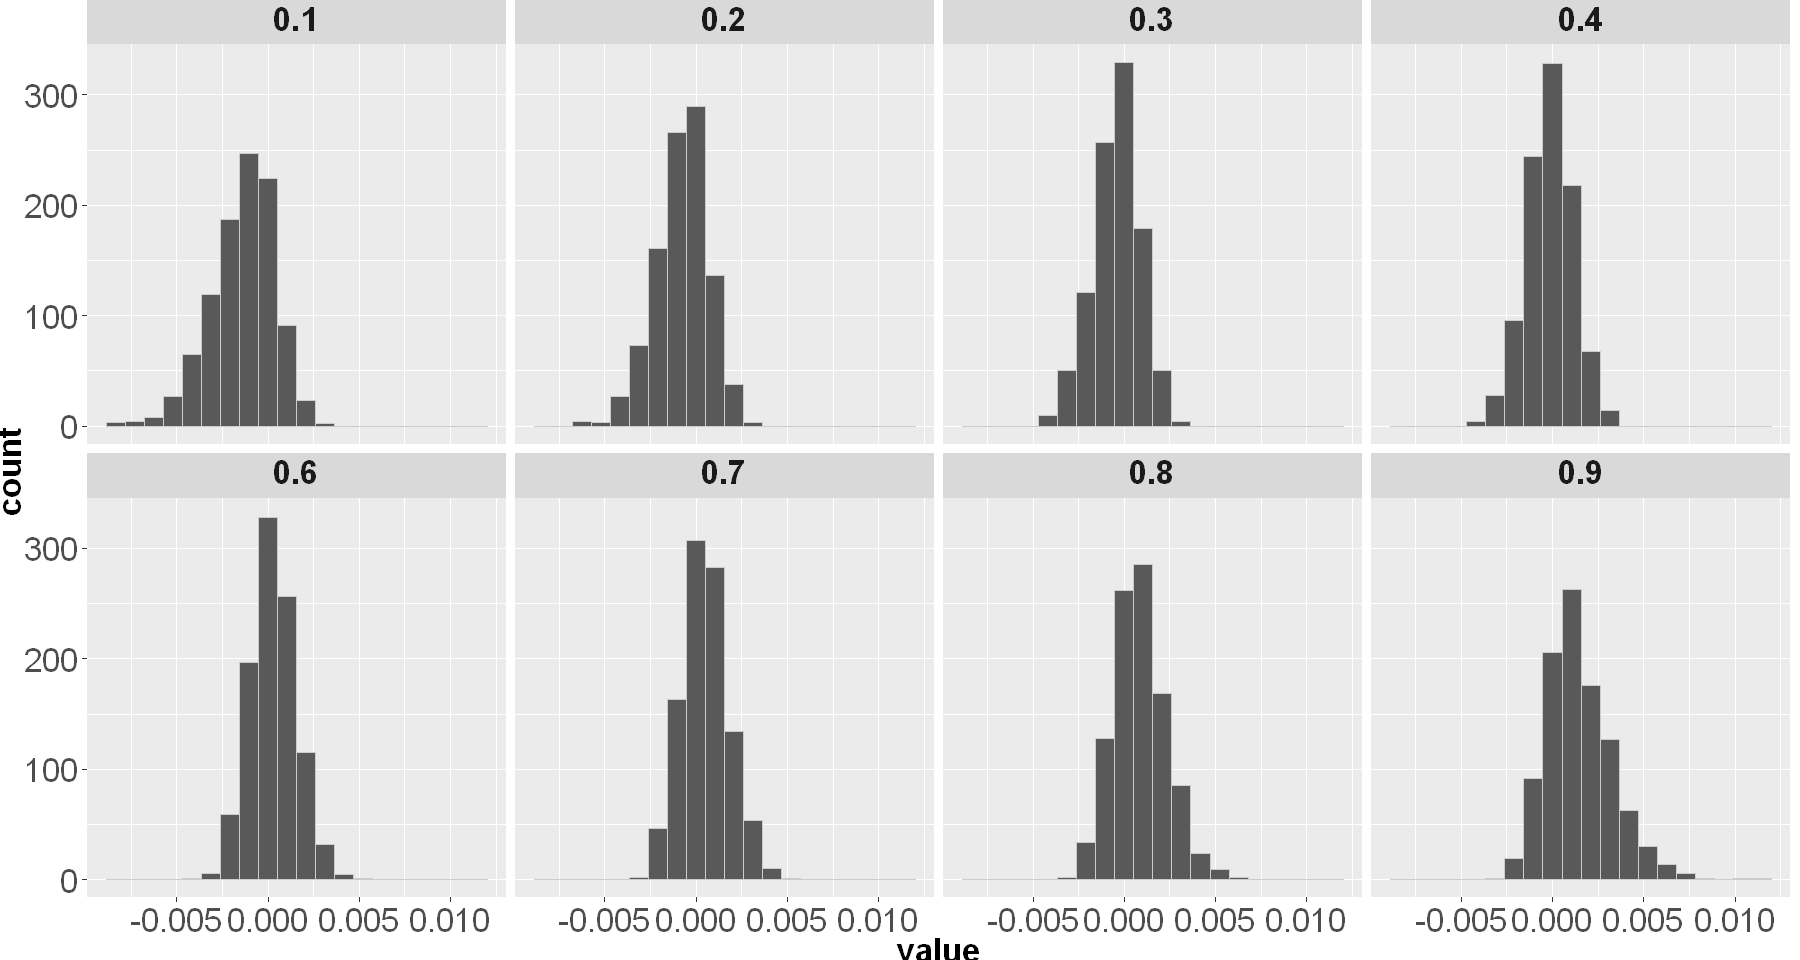

In [4]:
library("ggplot2")
options(repr.plot.width=15, repr.plot.height=8)
ggplot(TMP_iso, aes(x=value))+ 
  geom_histogram(bins=20,col = "gray80")+ 
  # xlim(-0.010, 0.010)+
  facet_grid(col = vars(xval), scales = "free")+
  facet_wrap(~xval, ncol = 4)+
  theme(
    axis.text.x=element_text(size = 20),
    axis.text.y=element_text(size=20),
    axis.title=element_text(size=20,face="bold"),
    strip.text = element_text(size=20,face = "bold"),
    plot.margin = unit(c(0,0.2,0,0), "cm"),
    plot.title=element_text(size=20),
    axis.text=element_text(size=12)
  )

The plots show the histogram of $\widehat{f}(x)$ for $x\in\{0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9\}$ when the true function is exactly zero. The histograms show the asymmetry changing from left skew to right skew as $x$ increases from $0.1$ to $0.9$, but the histrograms clearly show unimodality. 

## Unimodality for an exponential function
We now consider the case where the conditional mean function has a positive first derivative for all values in the covariate space. Formally, let $(X_i, Y_i), 1\le i\le N$ denote observations from
\begin{equation*}
Y_i = f_0(X_i) + \xi_i\quad\mbox{where}\quad f_0(x) = \exp(2x),\quad X_i\sim\mathrm{Unif}[0, 1], \quad \xi_i\sim N(0, 1).
\end{equation*}
We take $N = 10^6$ to approximate the limiting distribution. We find the LSE 1000 times with this sample size and plot the histograms at several $x$ values.

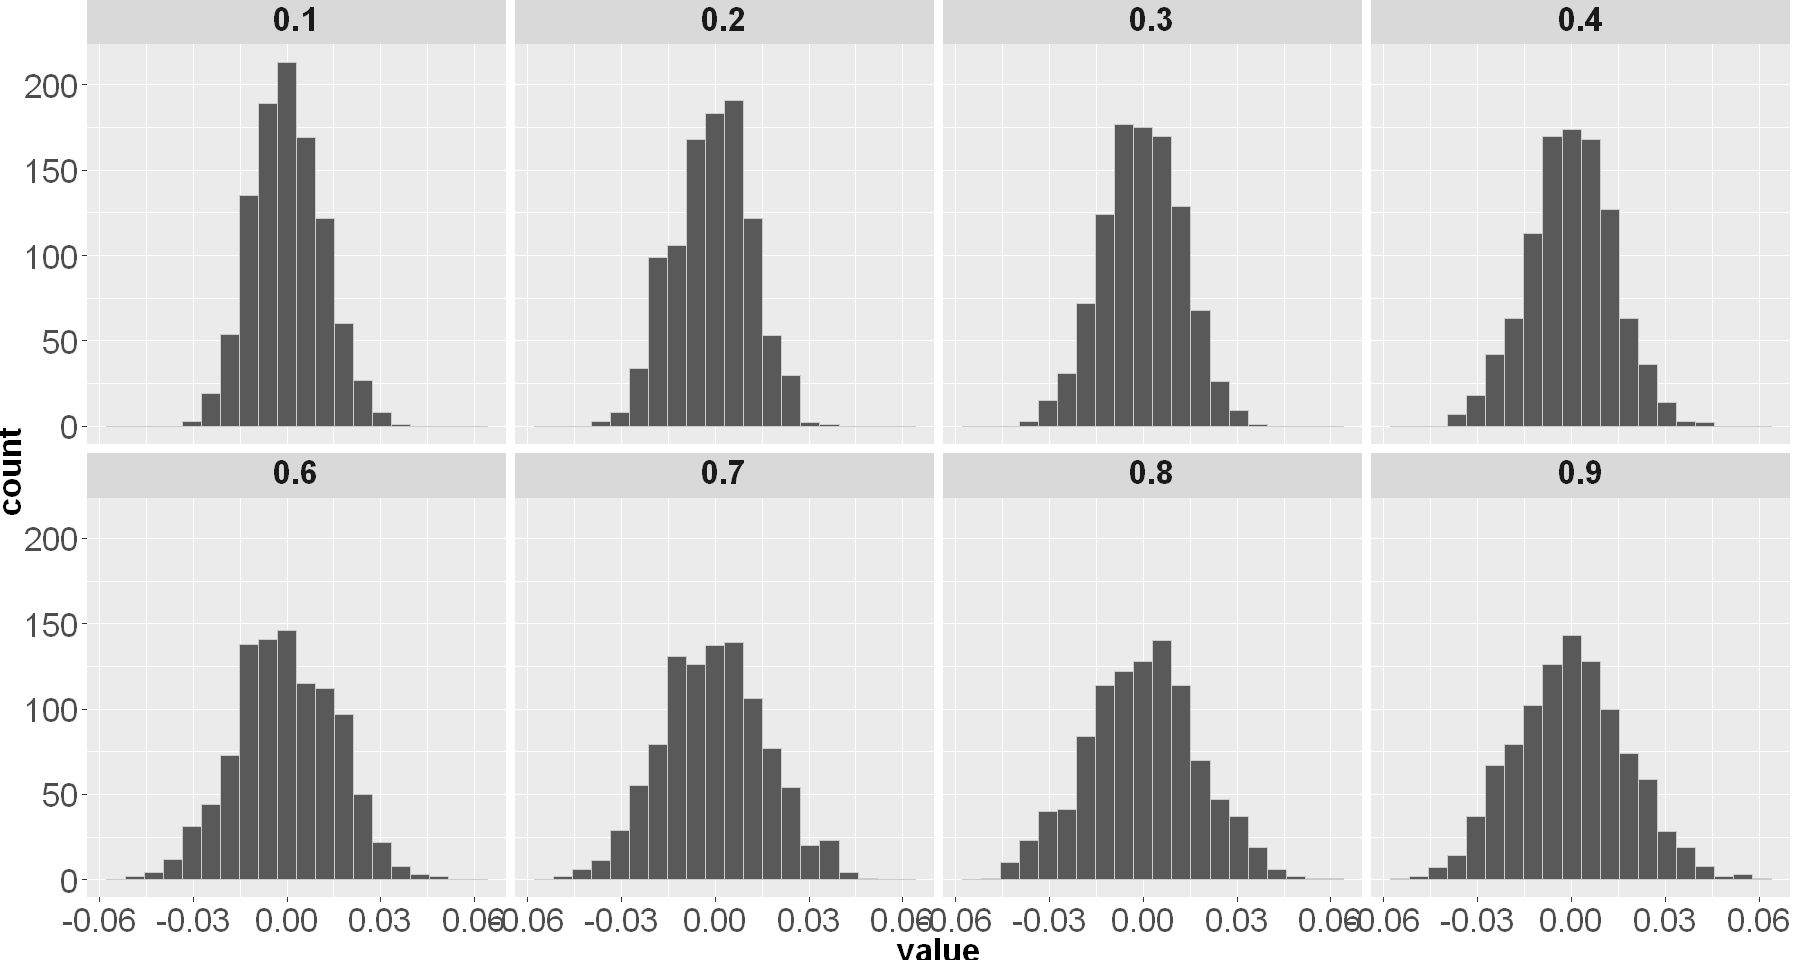

In [5]:
set.seed(100)
nsamp <- 10^6
nrep <- 1000
f0 <- function(x){ exp(2*x) }
x_grid <- c(0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9)
n_grid <- length(x_grid)
TMP_iso <- data.frame(value = rep(0, nrep*length(x_grid)), xval = rep(x_grid, nrep))
for(idx in 1:nrep){
  y <- f0(seq(0,1,length=nsamp)) + rnorm(nsamp)
  tmp <- isoreg(seq(0,1,length=nsamp),y)
  TMP_iso[seq(n_grid*(idx - 1) + 1, n_grid*idx, by = 1),1] <- tmp$yf[x_grid*nsamp] - f0(x_grid)
}
ggplot(TMP_iso, aes(x=value))+ 
  geom_histogram(bins=20,col = "gray80")+ 
  # xlim(-0.010, 0.010)+
  facet_grid(col = vars(xval), scales = "free")+
  facet_wrap(~xval, ncol = 4)+
  theme(
    axis.text.x=element_text(size = 20),
    axis.text.y=element_text(size=20),
    axis.title=element_text(size=20,face="bold"),
    strip.text = element_text(size=20,face = "bold"),
    plot.margin = unit(c(0,0.2,0,0), "cm"),
    plot.title=element_text(size=20),
    axis.text=element_text(size=12)
  )

Because the true function has a non-zero first derivative for all $x$ in the covariate space, we know that the limiting distribution is the Chernoff distribution. It is well-known that Chernoff distribution is unimodal and symmetric. The plots show the same.

## Unimodality for functions with varying local smoothness
We now consider the case where the conditional mean functions has different local smoothness. Formally, let $(X_i, Y_i), 1\le i\le N$ denote observations from
\begin{equation*}
Y_i = f_0(X_i) + \xi_i\quad\mbox{where}\quad f_0(x) = |x|^{\beta}\mathrm{sign}(x),\quad X_i\sim\mathrm{Unif}[-1, 1], \quad \xi_i\sim N(0, 1).
\end{equation*}
Note that $f_0$ satisfies the local smoothness condition with parameter $\beta$ at $x=0$. We take $N = 10^6$ to approximate the limiting distribution. We find the LSE 1000 times with this sample size and plot the histograms at $x = 0$ as $\beta$ changes.

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


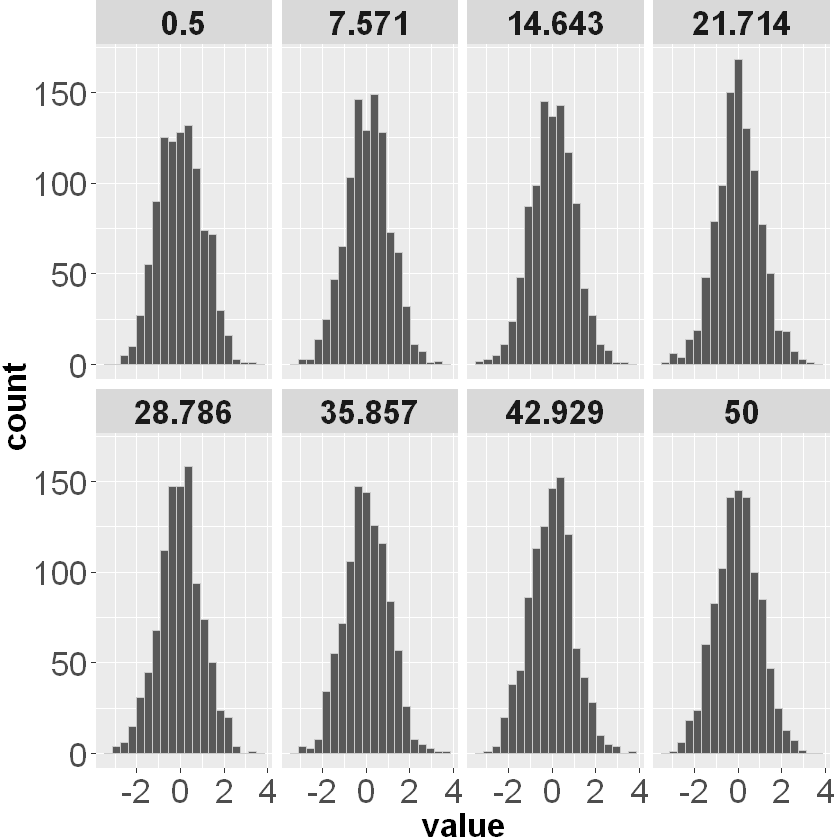

In [1]:
set.seed(100)
nsamp <- 10^6
nrep <- 1000
beta_grid <- seq(1/2, 50, length = 8)
final_grid <- expand.grid(1:nrep, beta_grid)
TMP_iso <- data.frame(value = rep(0, nrow(final_grid)), beta = final_grid[,2], rep = final_grid[,1])
for(idx in 1:nrow(final_grid)){
  # idx <- 1
  beta <- final_grid[idx, 2]
  f0 <- function(x){ sign(x)*abs(x)^beta }
  x <- seq(-1, 1, length = nsamp)
  y <- f0(x) + rnorm(nsamp)
  tmp <- isoreg(x,y)
  TMP_iso[idx,1] <- approxfun(tmp$x, tmp$yf, method="constant", rule = 2)(0)
}

### Because the rate of convergence of the LSE is different for different beta,
### we scale the estimates so that the histograms have the same support.
TMP2 <- TMP_iso
for(jdx in 1:length(beta_grid)){
  TMP2[TMP2$beta == beta_grid[jdx], 1] <- scale(TMP2[TMP2$beta == beta_grid[jdx], 1], center = FALSE, scale = TRUE)
}
TMP2$beta <- round(TMP2$beta, digits = 3)


library("ggplot2")
ggplot(TMP2, aes(x=value))+ 
  geom_histogram(bins=20,col = "gray80")+ 
  # xlim(-0.010, 0.010)+
  facet_grid(col = vars(beta), scales = "free")+
  facet_wrap(~beta, ncol = 4)+
  # facet_wrap(~beta, ncol = 8)+
  theme(
    axis.text.x=element_text(size = 20),
    axis.text.y=element_text(size=20),
    axis.title=element_text(size=20,face="bold"),
    strip.text = element_text(size=20,face = "bold"),
    plot.margin = unit(c(0,0.2,0,0), "cm"),
    plot.title=element_text(size=20),
    axis.text=element_text(size=12)
  )

We observe that the distributions are again unimodal at zero. We are not aware of results proving unimodality of the distribution $\mathbb{C}_{\beta}$ for any $\beta \neq 1$. As mentioned before $\mathbb{C}_1$ is a scalar multiple of the Chernoff distribution and is well-known to be unimodal.

## Adaptive HulC and Adaptive Unimodal HulC for a smooth function
The experiments above show that the limiting distribution of the monotone LSE for various types of local smoothness (or flatness). This suggests that adaptive unimodal HulC is applicable for monotone regression. In the following, we will compare adaptive HulC and adaptive unimodal HulC (with different values of $t$) with the monotone least squares estimator. The interesting case would be inference at boundary points where the median bias can get close to $1/2$ and adaptive HulC would require a large number of splits.

The setting is as follows: for $n = 100, 250$, data $(X_i, Y_i), 1\le i\le n$ is generated from
\begin{equation*}
Y_i = f_0(X_i) + \xi_i,\quad\mbox{where}\quad f_0(x) = e^{2x},\quad X_i\sim\mathrm{Unif}[0, 1],\quad \xi_i\sim N(0, 1).
\end{equation*}
We construct confidence intervals for $f_0(x)$ for $x$ in the equi-spaced grid of size 25 from $0.01$ to $0.99$. These confidence intervals are constructed based on adaptive unimodal HulC as $t$ changes from $0$ to $0.5$ by $0.05$.  

In [3]:
## Initiating matrices and vectors
## x_grid is the x^* values
x_grid <- seq(0.01, 0.99, length = 25)
## number of replications
nrep <- 500
## different sample sizes
nsamp_seq <- c(100, 250)
## sequence of t values for adaptive unimodal HulC
t_seq <- seq(0, 0.5, by = 0.05)
### Note that t = 0 is same as adaptive HulC

final_grid <- expand.grid(x_grid, nsamp_seq, t_seq, 1:nrep)
colnames(final_grid) <- c("x", "nsamp", "t", "rep")
hulc_final_grid <- data.frame(ci_lwr = rep(0, nrow(final_grid)),
                             ci_upr = rep(0, nrow(final_grid)),
                             med_bias = rep(0, nrow(final_grid)),
                             x = final_grid[,1],
                             nsamp = final_grid[,2],
                             t = final_grid[,3],
                             rep = final_grid[,4])
head(hulc_final_grid)
nrow(final_grid)

ci_lwr,ci_upr,med_bias,x,nsamp,t,rep
0,0,0,0.01000000,100,0,1
0,0,0,0.05083333,100,0,1
0,0,0,0.09166667,100,0,1
0,0,0,0.13250000,100,0,1
0,0,0,0.17333333,100,0,1
0,0,0,0.21416667,100,0,1


[1] 275000

In [4]:
source("HulC.R")
## Setting seed for reproducibility
set.seed(2021)
alpha <- 0.05
f0 <- function(x){ exp(2*x) }
for(idx in 1:nrow(final_grid)){
# idx <- 1
    x_seq <- runif(final_grid[idx,2])
    y_seq <- f0(x_seq) + rnorm(final_grid[idx, 2])
    estimate <- function(dat){
        tmp <- isoreg(dat[,1], dat[,2])
        approxfun(sort(tmp$x), tmp$yf, method="constant", rule = 2)(final_grid[idx,1])
    }
    ## using the default subsample size of n^{2/3}.
    tryCatch(
        tmp <- adaptive_unimodal_HulC(cbind(x_seq, y_seq), estimate, t = final_grid[idx, 3], alpha = alpha, nsub = 100),
        error = function(e){
          tmp <- list(CI = c(NA, NA), median.bias = NA)
        }
    )
    hulc_final_grid[idx, 1:2] <- tmp$CI
    hulc_final_grid[idx, 3] <- tmp$median.bias
}

Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"

[1] "Delta = 0.480000000000001, No. of splits = 149, Sample size = 100"
[1] "Delta = 0.490000000000001, No. of splits = 298, Sample size = 100"
[1] "Delta = 0.480000000000001, No. of splits = 149, Sample size = 100"


Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"

[1] "Delta = 0.480000000000001, No. of splits = 148, Sample size = 100"
[1] "Delta = 0.480000000000001, No. of splits = 148, Sample size = 100"
[1] "Delta = 0.480000000000001, No. of splits = 148, Sample size = 100"
[1] "Delta = 0.490000000000001, No. of splits = 298, Sample size = 250"
[1] "Delta = 0.480000000000001, No. of splits = 148, Sample size = 100"
[1] "Delta = 0.480000000000001, No. of splits = 148, Sample size = 100"


Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"

[1] "Delta = 0.490000000000001, No. of splits = 298, Sample size = 100"
[1] "Delta = 0.490000000000001, No. of splits = 298, Sample size = 100"


In [5]:
head(hulc_final_grid)

ci_lwr,ci_upr,med_bias,x,nsamp,t,rep
-0.7017909,0.9737891,0.17,0.01000000,100,0,1
0.4488639,1.9599636,0.16,0.05083333,100,0,1
-0.5282758,2.4546755,0.13,0.09166667,100,0,1
0.8630412,2.8107213,0.12,0.13250000,100,0,1
0.1962028,2.0844350,0.03,0.17333333,100,0,1
0.9772123,2.5290289,0.16,0.21416667,100,0,1


### Plotting

In [8]:
library("tidyverse")
width_cov_mat <- hulc_final_grid %>% mutate(width = ci_upr - ci_lwr, coverage = ((ci_upr - f0(x))*(f0(x) - ci_lwr) >= 0))
head(width_cov_mat)
average_width_cov <- width_cov_mat %>% 
                        group_by(x, nsamp, t) %>% 
                        summarize(ave_width = mean(width, na.rm = TRUE), 
                                  emp_cov = mean(coverage, na.rm = TRUE))
head(average_width_cov)

ci_lwr,ci_upr,med_bias,x,nsamp,t,rep,width,coverage
-0.7017909,0.9737891,0.17,0.01000000,100,0,1,1.675580,FALSE
0.4488639,1.9599636,0.16,0.05083333,100,0,1,1.511100,TRUE
-0.5282758,2.4546755,0.13,0.09166667,100,0,1,2.982951,TRUE
0.8630412,2.8107213,0.12,0.13250000,100,0,1,1.947680,TRUE
0.1962028,2.0844350,0.03,0.17333333,100,0,1,1.888232,TRUE
0.9772123,2.5290289,0.16,0.21416667,100,0,1,1.551817,TRUE


x,nsamp,t,ave_width,emp_cov
0.01,100,0.00,2.050633,0.940
0.01,100,0.05,2.135609,0.960
0.01,100,0.10,2.198386,0.938
0.01,100,0.15,2.278267,0.952
0.01,100,0.20,2.286347,0.952
0.01,100,0.25,2.559745,0.968


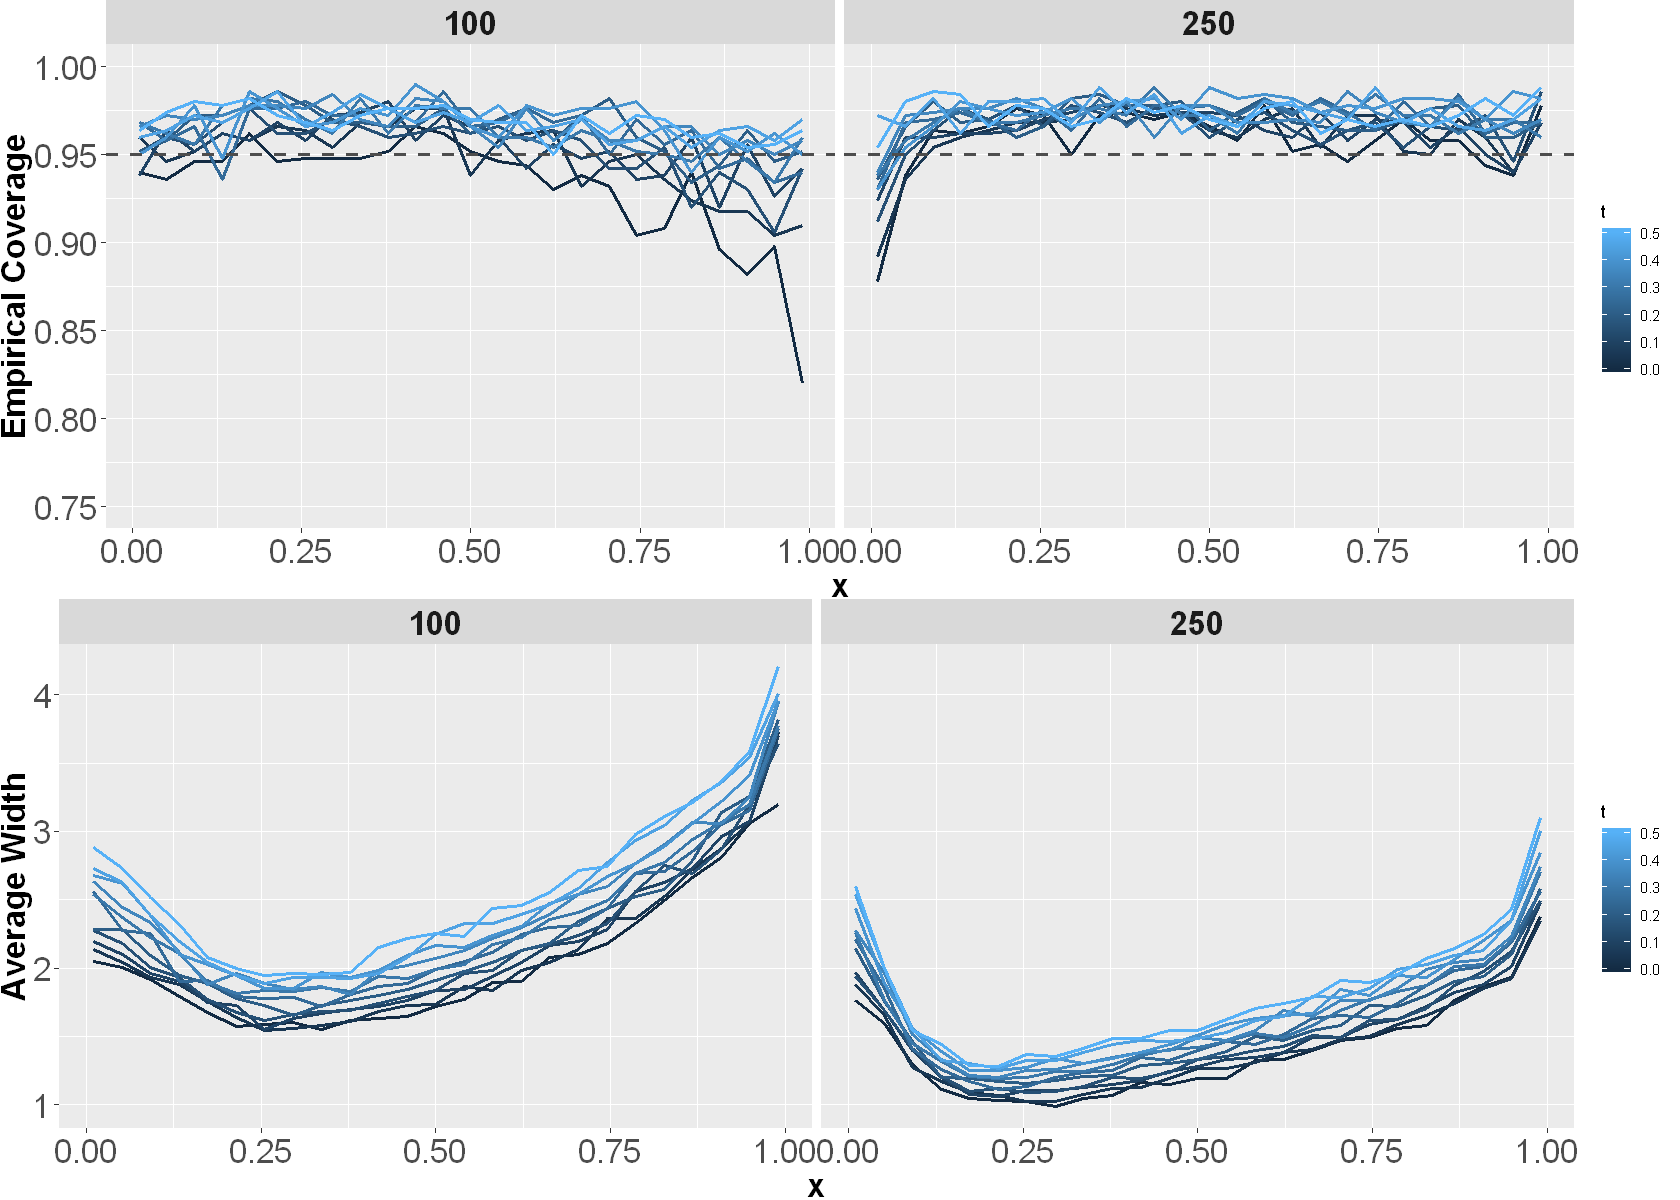

In [41]:
g1 <- ggplot(average_width_cov, aes(x = x, y = emp_cov, group = t, color = t)) +
        geom_line(size = 1.01) +
        ylim(0.75, 1) +
        geom_hline(yintercept = 0.95, color = "gray30", linetype = "dashed", size = 1.01) +
        ylab("Empirical Coverage") + 
        facet_wrap(~nsamp) + 
        theme(
            axis.text.x=element_text(size = 20),
            axis.text.y=element_text(size=20),
            axis.title=element_text(size=20,face="bold"),
            strip.text = element_text(size=20,face = "bold"),
            plot.margin = unit(c(0,0.2,0,0), "cm"),
            plot.title=element_text(size=20),
            axis.text=element_text(size=12)
        )
g2 <- ggplot(average_width_cov, aes(x = x, y = ave_width, group = t, color = t)) +
        geom_line(size = 1.01) +
        ylab("Average Width") + 
        facet_wrap(~nsamp) + 
        theme(
            axis.text.x=element_text(size = 20),
            axis.text.y=element_text(size=20),
            axis.title=element_text(size=20,face="bold"),
            strip.text = element_text(size=20,face = "bold"),
            plot.margin = unit(c(0,0.2,0,0), "cm"),
            plot.title=element_text(size=20),
            axis.text=element_text(size=12)
        )
options(repr.plot.width=14, repr.plot.height=10)
library("gridExtra")
grid.arrange(g1,g2, ncol = 1)

The above plot shows the average coverage and width of adaptive unimodal HulC as $t$ changes from $0$ to $0.5$ and also for two different sample sizes 100 and 250. As mentioned before, $t = 0$ corresponds to adaptive HulC. We notice from the plots that $t > 0$ in adaptive unimodal HulC yields better coverage than $t = 0$ (adaptive HulC), especially for $x$ near the boundary. This holds true even for the smaller sample size of 100. The average width increases with $t$. 

## Adaptive HulC and Adaptive Unimodal HulC for a non-smooth function
In the experiments above, we have used a function with an everywhere positive derivative. Now, we compare the performance of adpative HulC and adaptive unimodal HulC when the true function has a flat piece and a smooth piece. The example setting is as follows: for $n = 100, 250$, we generate i.i.d. observations $(X_i, Y_i), 1\le i\le n$, from
\begin{equation*}
Y_i = f_0(X_i) + \xi_i,\quad\mbox{where}\quad f_0(x) = -1 + \mathbf{1}\{x \le 0.5\} + (2x - 1)^2\mathbf{1}\{x > 0.5\},
\end{equation*}
and $X_i\sim \mathrm{Unif}[0, 1]$, $\xi_i\sim N(0, 1)$. We use adaptive and adaptive unimodal HulC to construct confidence intervals for $f_0(x)$ for $x$ in an equi-spaced grid of size $25$ from $0.01$ to $0.99$. 

In [42]:
## Initiating matrices and vectors
## x_grid is the x^* values
x_grid <- seq(0.01, 0.99, length = 25)
## number of replications
nrep <- 500
## different sample sizes
nsamp_seq <- c(100, 250)
## sequence of t values for adaptive unimodal HulC
t_seq <- seq(0, 0.5, by = 0.05)
### Note that t = 0 is same as adaptive HulC

final_grid <- expand.grid(x_grid, nsamp_seq, t_seq, 1:nrep)
colnames(final_grid) <- c("x", "nsamp", "t", "rep")
hulc_final_grid <- data.frame(ci_lwr = rep(0, nrow(final_grid)),
                             ci_upr = rep(0, nrow(final_grid)),
                             med_bias = rep(0, nrow(final_grid)),
                             x = final_grid[,1],
                             nsamp = final_grid[,2],
                             t = final_grid[,3],
                             rep = final_grid[,4])
head(hulc_final_grid)
nrow(final_grid)

ci_lwr,ci_upr,med_bias,x,nsamp,t,rep
0,0,0,0.01000000,100,0,1
0,0,0,0.05083333,100,0,1
0,0,0,0.09166667,100,0,1
0,0,0,0.13250000,100,0,1
0,0,0,0.17333333,100,0,1
0,0,0,0.21416667,100,0,1


[1] 275000

In [ ]:
source("HulC.R")
## Setting seed for reproducibility
set.seed(2021)
alpha <- 0.05
f0 <- function(x){ -1*(x<=.5)+ ((x-.5)/.5)^2*(x>.5)+1 }
for(idx in 1:nrow(final_grid)){
# idx <- 1
    x_seq <- runif(final_grid[idx,2])
    y_seq <- f0(x_seq) + rnorm(final_grid[idx, 2])
    estimate <- function(dat){
        tmp <- isoreg(dat[,1], dat[,2])
        approxfun(sort(tmp$x), tmp$yf, method="constant", rule = 2)(final_grid[idx,1])
    }
    ## using the default subsample size of n^{2/3}.
    tryCatch(
        tmp <- adaptive_unimodal_HulC(cbind(x_seq, y_seq), estimate, t = final_grid[idx, 3], alpha = alpha, nsub = 100),
        error = function(e){
          tmp <- list(CI = c(NA, NA), median.bias = NA)
        }
    )
    hulc_final_grid[idx, 1:2] <- tmp$CI
    hulc_final_grid[idx, 3] <- tmp$median.bias
}

Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"

[1] "Delta = 0.490000000000001, No. of splits = 298, Sample size = 100"
[1] "Delta = 0.480000000000001, No. of splits = 149, Sample size = 100"


Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"

[1] "Delta = 0.490000000000001, No. of splits = 299, Sample size = 100"
[1] "Delta = 0.490000000000001, No. of splits = 298, Sample size = 100"
[1] "Delta = 0.490000000000001, No. of splits = 298, Sample size = 100"


Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"

In [ ]:
head(hulc_final_grid)

### Plotting

In [ ]:
library("tidyverse")
width_cov_mat <- hulc_final_grid %>% mutate(width = ci_upr - ci_lwr, coverage = ((ci_upr - f0(x))*(f0(x) - ci_lwr) >= 0))
head(width_cov_mat)
average_width_cov <- width_cov_mat %>% 
                        group_by(x, nsamp, t) %>% 
                        summarize(ave_width = mean(width, na.rm = TRUE), 
                                  emp_cov = mean(coverage, na.rm = TRUE))
head(average_width_cov)

In [ ]:
g1 <- ggplot(average_width_cov, aes(x = x, y = emp_cov, group = t, color = t)) +
        geom_line(size = 1.01) +
        ylim(0.75, 1) +
        geom_hline(yintercept = 0.95, color = "gray30", linetype = "dashed", size = 1.01) +
        ylab("Empirical Coverage") + 
        facet_wrap(~nsamp) + 
        theme(
            axis.text.x=element_text(size = 20),
            axis.text.y=element_text(size=20),
            axis.title=element_text(size=20,face="bold"),
            strip.text = element_text(size=20,face = "bold"),
            plot.margin = unit(c(0,0.2,0,0), "cm"),
            plot.title=element_text(size=20),
            axis.text=element_text(size=12)
        )
g2 <- ggplot(average_width_cov, aes(x = x, y = ave_width, group = t, color = t)) +
        geom_line(size = 1.01) +
        ylab("Average Width") + 
        facet_wrap(~nsamp) + 
        theme(
            axis.text.x=element_text(size = 20),
            axis.text.y=element_text(size=20),
            axis.title=element_text(size=20,face="bold"),
            strip.text = element_text(size=20,face = "bold"),
            plot.margin = unit(c(0,0.2,0,0), "cm"),
            plot.title=element_text(size=20),
            axis.text=element_text(size=12)
        )
options(repr.plot.width=14, repr.plot.height=10)
library("gridExtra")
grid.arrange(g1,g2, ncol = 1)